# Lab Imbalanced Data

## Load the dataset and explore the variables.


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
data=pd.read_csv('customer_churn.csv')

In [68]:
print(data.shape)
data.head(10)

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


## We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.


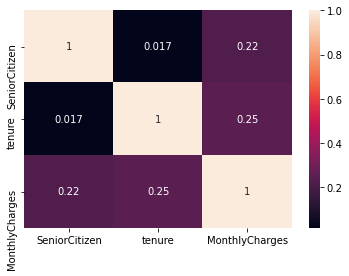

In [69]:
X = data.drop('Churn',axis = 1)
y = data['Churn']

correlations_matrix = data.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

## Extract the target variable.


In [70]:
X = data[['SeniorCitizen','tenure','MonthlyCharges']] #pick these as the lab implies
y = data['Churn']

## Extract the independent variables and scale them.


In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Build the logistic regression model.


In [74]:
X_train

,SeniorCitizen,tenure,MonthlyCharges
3296,0,24,49.30
6397,1,54,65.25
6043,0,3,40.15
5309,0,61,20.25
3000,0,12,84.45
...,...,...,...
4931,0,15,103.45
3264,0,10,91.10
1653,0,58,20.75
2607,1,1,69.75


In [90]:
#now i MinMax my numericals to standardize them
from sklearn.preprocessing import MinMaxScaler

MinMaxtransformer = MinMaxScaler().fit(X_train)
X_train_scaled = MinMaxtransformer.transform(X_train)
print(X_train_scaled.shape)

MinMaxtransformer = MinMaxScaler().fit(X_test)
X_test_scaled = MinMaxtransformer.transform(X_test)
print(X_test_scaled)

y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True) 

#lets train the model

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)

logits = np.log(1/LR.predict_proba(X_train_scaled)[:,1]-1) # i dont remember what this does 

(5282, 3)
[[0.         0.26388889 0.39661186]
 [0.         0.83333333 0.97857499]
 [0.         0.18055556 0.53363229]
 ...
 [0.         0.66666667 0.0159442 ]
 [0.         0.98611111 0.68211261]
 [0.         0.88888889 0.06278027]]


In [91]:
LR.score(X_test_scaled, y_test)

0.7830777967064169

## Evaluate the model.


In [103]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred, pos_label="Yes"))
print("recall: ",recall_score(y_test,pred, pos_label="Yes"))
print("f1: ",f1_score(y_test,pred, pos_label="Yes"))

#Had to use this because of categorical column in the model.




precision:  0.6201780415430267
recall:  0.4514038876889849
f1:  0.5225


## Even a simple model will give us more than 70% accuracy. Why?


In [107]:
# this is because of the imbalance in the set.
# so out of 100 guesses even if you would say all yes, it would give 70% correct answers

(7752, 3)
precision:  0.4790764790764791
recall:  0.7170626349892009
f1:  0.57439446366782


## Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [108]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=100,k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

print(X_train_SMOTE.shape)

LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred,pos_label='Yes'))
print("recall: ",recall_score(y_test,pred,pos_label='Yes'))
print("f1: ",f1_score(y_test,pred,pos_label='Yes'))

#it seems to give me the exact same figures so ill have to review my model once again

(7752, 3)
precision:  0.4790764790764791
recall:  0.7170626349892009
f1:  0.57439446366782
